In [ ]:
from sklearn.datasets import load_iris

In [ ]:
iris = load_iris()

In [ ]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [ ]:
print(iris["DESCR"])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [ ]:
import pandas as pd

In [ ]:
X = pd.DataFrame(data=iris.data, columns = iris.feature_names)

In [ ]:
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
y = pd.DataFrame(data=iris.target, columns = ["irisType"])

In [ ]:
y.head()

,irisType
0,0
1,0
2,0
3,0
4,0


In [ ]:
y.irisType.value_counts()

0    50
1    50
2    50
Name: irisType, dtype: int64

In [ ]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
import seaborn as sns

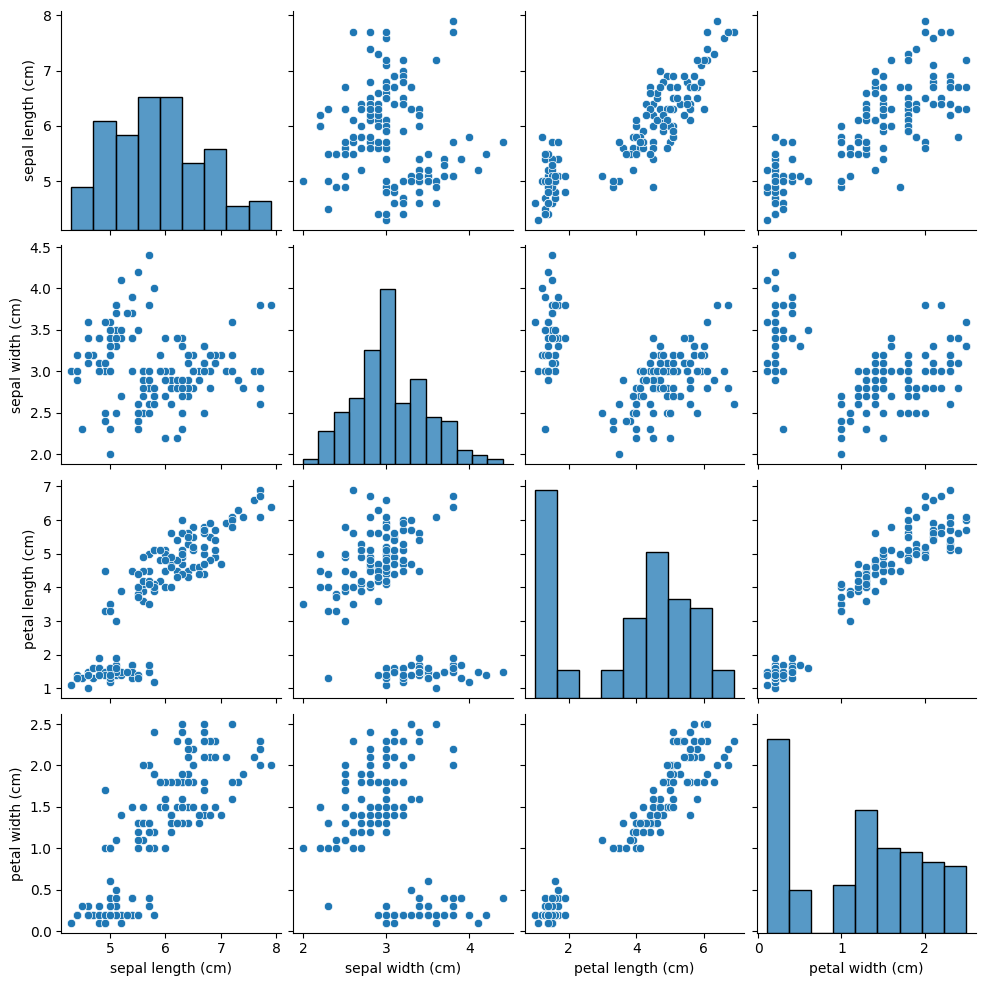

In [ ]:
sns.pairplot(X)

In [ ]:
X.info() #eksik veri var mı kontrol ediyoruz

#eksik veri olsaydı ya ortalama ile eksik verileri doldurabilirdik ya da eksik veri bulunan satırları silerdik

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#veri setinin %20sini test verisi %80ini eğitim verisi olarak ayarladık

In [ ]:
X_train.shape

(120, 4)

In [ ]:
X_test.shape

(30, 4)

* Eğitim verisinde 120 tane veri ve 4 tane öznitelik vardır.
* Test verisinin yapısında 30 tane veri ve 4 öznitelik vardır.

In [ ]:
y_train.shape #çıktı eğitim verisinin yapısı

(120, 1)

In [ ]:
y_test.shape #çıktı test verisinin yapısı

(30, 1)

var() methodu ile verideki varyansı kontrol edelim.

In [ ]:
X_train.var(), X_test.var()

(sepal length (cm)    0.678655
 sepal width (cm)     0.201711
 petal length (cm)    3.070711
 petal width (cm)     0.565938
 dtype: float64,
 sepal length (cm)    0.714069
 sepal width (cm)     0.148000
 petal length (cm)    3.390402
 petal width (cm)     0.657575
 dtype: float64)

Varyans yüksekse normalleştirme gerekir.

In [ ]:
import tensorflow as tf

   

**Çıktı verimiz üç sınıftan oluşuyor. Derin öğrenme için bu veriyi One Hot Encoding ile düzenlememiz gerekir.**

* One Hot Encoding, kategorik değişkenlerin ikili (binary) olarak temsil edilmesi anlamına
gelmektedir. Bu işlem ilk önce kategorik değerlerin tamsayı değerleriyle eşlenmesini gerektirir. Daha sonra, her bir tamsayı değeri, 1 ile işaretlenmiş tamsayı indeksi dışındaki tüm değerleri sıfır olan bir ikili vektör olarak temsil edilir.

In [ ]:
y_train=tf.keras.utils.to_categorical(y_train)

In [ ]:
y_test= tf.keras.utils.to_categorical(y_test)

In [ ]:
y_train[:5, :] #pandas yapısından numpy array yapısına çeviriyoruz

array([[1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

In [ ]:
#girdi veri setini de numpy array yapısına çevirelim
X_train=X_train.values
X_test=X_test.values

In [ ]:
#eğitim girdi verisinin ilk elemanını ekrana yazdıralım.
X_train[0]

array([4.6, 3.6, 1. , 0.2])

In [ ]:
from tensorflow.keras.models import Sequential #Sequential katmanları(layers) lineer olarak bir araya getirir.

In [ ]:
from tensorflow.keras.layers import Dense #katmandaki nöronlar birbirine bağlanır

In [ ]:
model=Sequential()
model.add(Dense(64, activation="relu", input_shape=X_train[0].shape))
model.add(Dense(128, activation="relu"))
model.add(Dense(64, activation="relu"))
model.add(Dense(3, activation="softmax")) #çıktı katmanı, sonuç değişkeninde 3 kategori olduğu için bu katmana 3 tane nöron ekledik.

**Çoklu sınıflandırma** problemi üzerinde çalıştığımız için çıkış katmanında aktivasyon foknsiyonu olarak 'softmax' fonksiyonunu kullandık.


İkili sınıflandırma olsaydı **'Sigmoid'** fonksiyonu kullanırdık.

## Modelin “compile” edilmesi (derlenmesi)

Bu adımda modelin optimizer, loss gibi parametrelerini ayarlıyoruz. loss icin, çoklu sınıflandırma yaptığımız için “categorical_crossentropy” kullanıyoruz.

In [ ]:
from keras.engine.training import optimizer
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["acc"])

* “optimizer” parametresi, w değerlerinin iyileştirilmesi için kullanılan optimizasyon algoritmalarının kullanılmasını sağlamaktadır. Kullanılan
“adam” *(Adaptive Moment Estimation)* algoritması, her bir parametre için gerçek zamanlı olarak ögrenme oranını günceller.

* “loss” parametresi, her eğitimden sonra elde edilen değerler ile
değerler arasındaki hata farkının hesaplanmasıdır.

* “metrics” parametresi, eğitim aşamasında her epoch sonrasında sonuçları değerlendirmek için bir sınanma işlemi yapmaktadır. Kullanılan
“accuracy”, modelin başarısını inceleyebilmek için kullanılan yaygın bir
metriktir.

## Modelin "fit" edilmesi

In [ ]:
history=model.fit(X_train, y_train, batch_size=32, epochs=8, validation_split=0.2)

Epoch 1/8
3/3 [==============================] - 1s 139ms/step - loss: 1.1575 - acc: 0.2396 - val_loss: 0.9991 - val_acc: 0.3333
Epoch 2/8
3/3 [==============================] - 0s 27ms/step - loss: 0.9561 - acc: 0.6146 - val_loss: 0.9229 - val_acc: 0.5000
Epoch 3/8
3/3 [==============================] - 0s 20ms/step - loss: 0.8409 - acc: 0.7188 - val_loss: 0.8217 - val_acc: 0.7500
Epoch 4/8
3/3 [==============================] - 0s 27ms/step - loss: 0.7646 - acc: 0.7604 - val_loss: 0.7261 - val_acc: 0.7083
Epoch 5/8
3/3 [==============================] - 0s 18ms/step - loss: 0.6913 - acc: 0.7604 - val_loss: 0.6865 - val_acc: 0.9167
Epoch 6/8
3/3 [==============================] - 0s 27ms/step - loss: 0.6240 - acc: 0.9167 - val_loss: 0.6530 - val_acc: 0.6667
Epoch 7/8
3/3 [==============================] - 0s 17ms/step - loss: 0.5683 - acc: 0.8750 - val_loss: 0.5960 - val_acc: 0.9167
Epoch 8/8
3/3 [==============================] - 0s 16ms/step - loss: 0.5283 - acc: 0.8854 - val_loss: 

* “batch_size” argümanı model eğitilirken kaçar örnek alınacağını belirler.
* “epoch” modelin kaç defa eğitim verisini göreceğini belirler.

* “epoch” sayısı arttıkça modelin eğitim süresi de artar.

* “Validarion” modelin eğitilmesini iyileştirmek için kullanılır.

* “validation_split=0.2” yazdığımızda eğitim verisinin 0.2 lik kısmı validation için kullanılacak
demektir.

In [ ]:
import matplotlib.pyplot as plt

"accuracy" grafiği (doğruluk oranı grafiği)

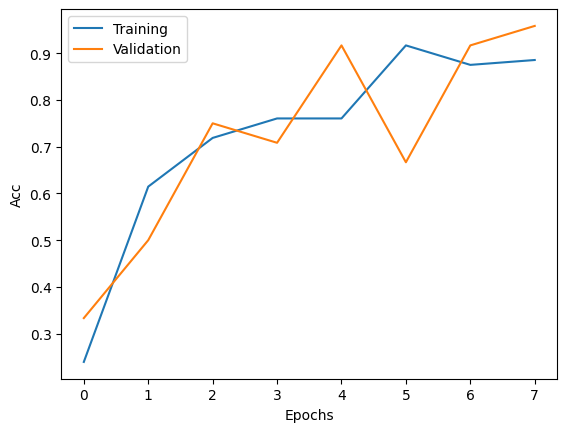

In [ ]:
plt.plot(history.history["acc"])
plt.plot(history.history["val_acc"])
plt.xlabel("Epochs")
plt.ylabel("Acc")
plt.legend(["Training","Validation"])

"loss" grafiği (kayıp değer grafiği)

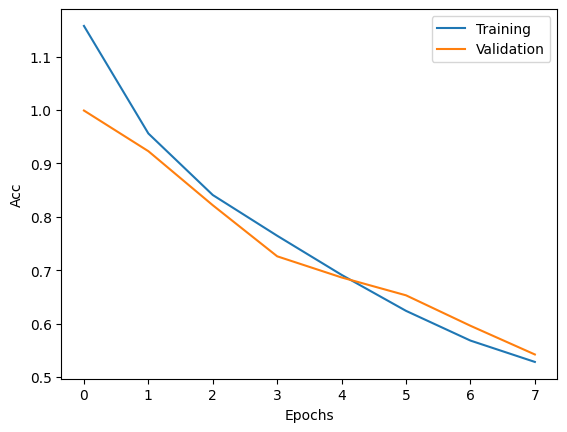

In [ ]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.xlabel("Epochs")
plt.ylabel("Acc")
plt.legend(["Training","Validation"])

Test verisini kullanarak modelin performansını değerlendirelim.

In [ ]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 43ms/step - loss: 0.4918 - acc: 0.9667


[0.49179038405418396, 0.9666666388511658]